# Correlação

Ao visualizarmos uma correlação, estamos interessados em analisar como duas variáveis se relacionam entre si. Por exemplo, podemos querer visualizar a relação entre a popularidade e alguma feature acústica de música de sucesso. Para representar graficamente a relação de duas dessas variáveis, por exemplo, a popularidade e a duração da música, geralmente utilizamos um gráfico de dispersão. Ele pode ser útil também para conjuntos de dados com alta dimensionalidade, como foi exemplificado na Seção X. Nos exemplos a seguir, nós exploramos o gráfico de dispersão básico e algumas variações, incluindo gráficos de bolhas e correlogramas. Para todos os exemplos, consideramos o conjunto de dados `Hits`.

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 6)

In [2]:
# Lendo os dados
df_hits = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv', encoding='utf-8')
df_hits.head()

,song_id,song_name,artist_id,...,speechiness,valence,tempo
0,2rRJrJEo19S2J82BDsQ3F7,Falling,['7uaIm6Pw7xplS8Dy06V6pT'],...,0.0364,0.236,127.087
1,3BYIzNZ3t9lRQCACXSMLrT,Venetia,['4O15NlyKLIASxsJ0PrXPfz'],...,0.1750,0.562,142.933
2,1g3J9W88hTG173ySZR6E9S,Tilidin Weg,['1aS5tqEs9ci5P9KD9tZWa6'],...,0.2330,0.171,109.090
3,75pQqzwgCjUOSSy5CpmAjy,Pero Ya No,['4q3ewBCX7sLwd24euuV69X'],...,0.1180,0.742,147.982
4,7kDUspsoYfLkWnZR7qwHZl,my ex's best friend (with blackbear),"['6TIYQ3jFPwQSRmorSezPxX', '2cFrymmkijnjDg9SS9...",...,0.0434,0.298,124.939


## Gráfico de Dispersão

É feito para estudar a relação entre duas variáveis. Para cada ponto de dados, o valor de sua primeira variável é representado no eixo X, a segunda no eixo Y. A seguir, plotamos dois gráficos de dispersão sobre a popularidade em relação à duração e energia das músicas, respectivamente. Para isso, utilizamos o método `matplotlib.pyplot.scatter`.

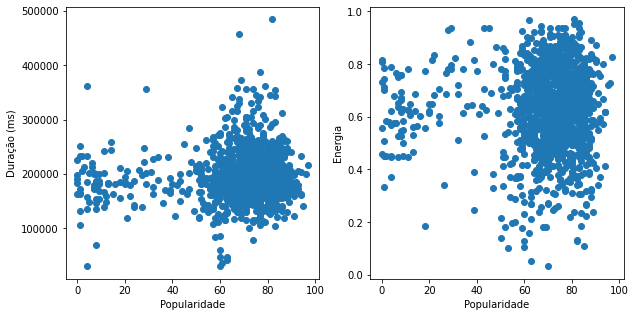

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(  # popularidade vs. duração
    x = df_hits['popularity'],
    y = df_hits['duration_ms']) 
ax[0].set_xlabel("Popularidade")
ax[0].set_ylabel("Duração (ms)")
ax[1].scatter(  # popularidade vs. energia
    x = df_hits['popularity'],
    y = df_hits['energy']) 
ax[1].set_xlabel("Popularidade")
ax[1].set_ylabel("Energia");

Geralmente, linhas ou curvas são ajustadas dentro do gráfico de dispersão para auxiliar a análise. Utilizando o método `seaborn.regplot`, plotamos os mesmos gráficos de dispersão mas, agora, com uma reta vermelha representando o ajuste linear.

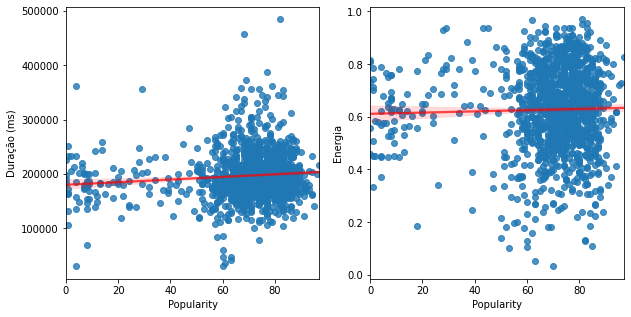

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
# Criando um gráfico de dispersão com o ajuste linear
sns.regplot(
    x='popularity', y='duration_ms', data=df_hits,
    ax=axs[0], line_kws={"color":"r","alpha":0.7})
axs[0].set(xlabel='Popularity', ylabel='Duração (ms)')
sns.regplot(
    x='popularity', y='energy', data=df_hits,
    ax=axs[1], line_kws={"color":"r","alpha":0.7})
axs[1].set(xlabel='Popularity', ylabel='Energia');

## Gráfico de bolhas

É um gráfico de dispersão onde uma terceira dimensão é adicionada.Este tipo de gráfico recebe três variáveis numéricas como entrada: uma é representada pelo eixo x, uma pelo eixo y e uma pelo tamanho dos pontos. Considere, por exemplo, que desejamos analisar a popularidade das músicas em relação à duração em milissegundos, baseado no nível de energia da música. A seguir, usamos a função `seaborn.scatterplot()` para criar um gráfico de bolhas. Especificamente, a função possui um parâmetro que controla o tamanho do círculo de acordo com uma variável numérica do conjunto de dados. No nosso caso, a variável numérica consiste no atributo `energy`.

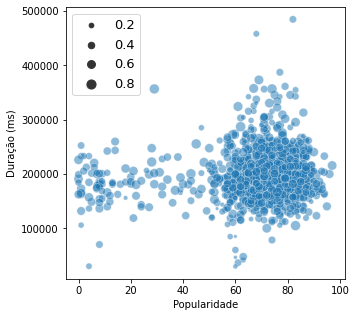

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=df_hits,
    x="popularity", 
    y="duration_ms",
    size="energy", 
    alpha=0.5,
    sizes=(5, 100))
plt.legend(loc='upper left', fontsize=13)
ax.set_xlabel('Popularidade')
ax.set_ylabel('Duração (ms)');

## Correlogramas

Ou matriz de correlação permite analisar a relação entre cada par de variáveis numéricas de um conjunto de dados. Geralmente, a relação entre cada par de variáveis é visualizada através de um gráfico de dispersão, enquanto a diagonal representa a distribuição de cada variável, usando um histograma ou um gráfico de densidade. Correlogramas são muito úteis na Análise Exploratória, visto que eles permitem visualizar as relações de todo o conjunto de dados de uma só vez. Utilizar a função `seaborn.pairplot()` é definitivamente a melhor maneira de construir um correlograma em Python. No exemplo a seguir, criamos um correlograma básico de um subconjunto de quatro variáveis numéricas do nosso conjunto de músicas.

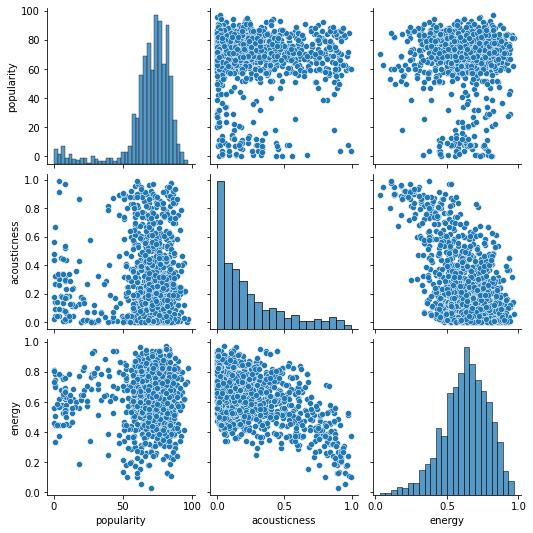

In [6]:
df = df_hits[['popularity', 'acousticness', 'energy']]
sns.pairplot(df); # criando um correlograma

## Conclusão

Este notebook apresentou como visualizar correlações

O próximo notebook ([5.5.Evolucao.ipynb](5.5.Evolucao.ipynb)) apresenta como visualizar evoluções.